In [9]:
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.expand_frame_repr", False)  # avoid line-wrapping


In [13]:
import pandas as pd

df = pd.read_parquet("../results/runs.parquet")
df[:10]


,potential,ansatz,reps,entanglement,backend,noise_strength,shots,seed,k_states,runtime_sec,eval_count,success,num_pauli_terms,L,N,dx,n_qubits,hilbert_dim,x_min,x_max,hbar,m,depth,two_qubit_count,num_parameters,E0,E1,E2,E3,E4,E_exact0,E_exact1,E_exact2,E_exact3,E_exact4,E_err0,E_err1,E_err2,E_err3,E_err4,E_grid0,E_grid1,E_grid2,E_grid3,E_grid4,E_pad_err0,E_pad_err1,E_pad_err2,E_pad_err3,E_pad_err4,E_analytic0,E_analytic1,E_analytic2,E_analytic3,E_analytic4,E_analytic_err0,E_analytic_err1,E_analytic_err2,E_analytic_err3,E_analytic_err4,padding_leakage_max,padding_leakage_mean,gap_err_0,gap_err_1,gap_err_2,gap_err_3
0,isw,efficient_su2,1,linear,statevector,NaN,NaN,0,5,17.844412,756,True,16,1.0,16,0.058824,4,16,0.058824,0.941176,1.0,1.0,7,3,16,27.517090,188.315674,135.795074,283.964020,373.041779,4.920774,19.515526,43.287248,75.426423,114.83859,22.596316,168.800148,92.507827,208.537597,258.203188,4.920774,19.515526,43.287248,75.426423,114.83859,2.930989e-14,3.552714e-14,5.684342e-14,9.947598e-14,5.684342e-14,4.934802,19.739209,44.41322,78.956835,123.370055,0.014028,0.223683,1.125972,3.530412,8.531465,7.771561e-16,-2.886580e-16,146.203832,76.292321,116.029770,49.665592
1,isw,efficient_su2,1,linear,statevector,NaN,NaN,1,5,16.759159,724,True,16,1.0,16,0.058824,4,16,0.058824,0.941176,1.0,1.0,7,3,16,48.384216,117.053467,229.335541,301.991241,438.377228,4.920774,19.515526,43.287248,75.426423,114.83859,43.463442,97.537941,186.048293,226.564819,323.538638,4.920774,19.515526,43.287248,75.426423,114.83859,2.930989e-14,3.552714e-14,5.684342e-14,9.947598e-14,5.684342e-14,4.934802,19.739209,44.41322,78.956835,123.370055,0.014028,0.223683,1.125972,3.530412,8.531465,7.771561e-16,-2.886580e-16,54.074499,88.510352,40.516526,96.973819
2,isw,efficient_su2,1,linear,statevector,NaN,NaN,2,5,20.522076,863,True,16,1.0,16,0.058824,4,16,0.058824,0.941176,1.0,1.0,7,3,16,63.686188,63.792023,133.422607,339.730225,278.160736,4.920774,19.515526,43.287248,75.426423,114.83859,58.765414,44.276497,90.135360,264.303802,163.322146,4.920774,19.515526,43.287248,75.426423,114.83859,2.930989e-14,3.552714e-14,5.684342e-14,9.947598e-14,5.684342e-14,4.934802,19.739209,44.41322,78.956835,123.370055,0.014028,0.223683,1.125972,3.530412,8.531465,7.771561e-16,-2.886580e-16,14.488917,45.858863,174.168442,100.981656
3,isw,efficient_su2,1,linear,noisy,0.000,2000.0,0,5,26.109678,891,True,16,1.0,16,0.058824,4,16,0.058824,0.941176,1.0,1.0,13,3,16,27.517090,92.226349,252.451660,356.893127,317.469604,4.920774,19.515526,43.287248,75.426423,114.83859,22.596316,72.710823,209.164412,281.466705,202.631014,4.920774,19.515526,43.287248,75.426423,114.83859,2.930989e-14,3.552714e-14,5.684342e-14,9.947598e-14,5.684342e-14,4.934802,19.739209,44.41322,78.956835,123.370055,0.014028,0.223683,1.125972,3.530412,8.531465,7.771561e-16,-2.886580e-16,50.114508,136.453589,72.302292,78.835690
4,isw,efficient_su2,1,linear,noisy,0.000,2000.0,1,5,24.794234,830,True,16,1.0,16,0.058824,4,16,0.058824,0.941176,1.0,1.0,13,3,16,48.384216,117.926605,223.990875,279.580688,378.721588,4.920774,19.515526,43.287248,75.426423,114.83859,43.463442,98.411080,180.703627,204.154266,263.882998,4.920774,19.515526,43.287248,75.426423,114.83859,2.930989e-14,3.552714e-14,5.684342e-14,9.947598e-14,5.684342e-14,4.934802,19.739209,44.41322,78.956835,123.370055,0.014028,0.223683,1.125972,3.530412,8.531465,7.771561e-16,-2.886580e-16,54.947637,82.292548,23.450638,59.728732
5,isw,efficient_su2,1,linear,noisy,0.000,2000.0,2,5,26.462036,876,True,16,1.0,16,0.058824,4,16,0.058824,0.941176,1.0,1.0,13,3,16,63.686188,116.656586,394.958435,166.055054,412.606415,4.920774,19.515526,43.287248,75.426423,114.83859,58.765414,97.141060,351.671187,90.628631,297.767825,4.920774,19.515526,43.287248,75.426423,114.83859,2.930989e-14,3.552714e-14,5.684342e-14,9.947598e-14,5.684342e-14,4.934802,19.739209,44.41322,78.956835,123.370055,0.014028,0.223683,1.125972,3.530412,8.531465,7.771561e-16,-2.886580e-16,38.375646,254.530127,261.042556,207.139194
6,isw,efficient

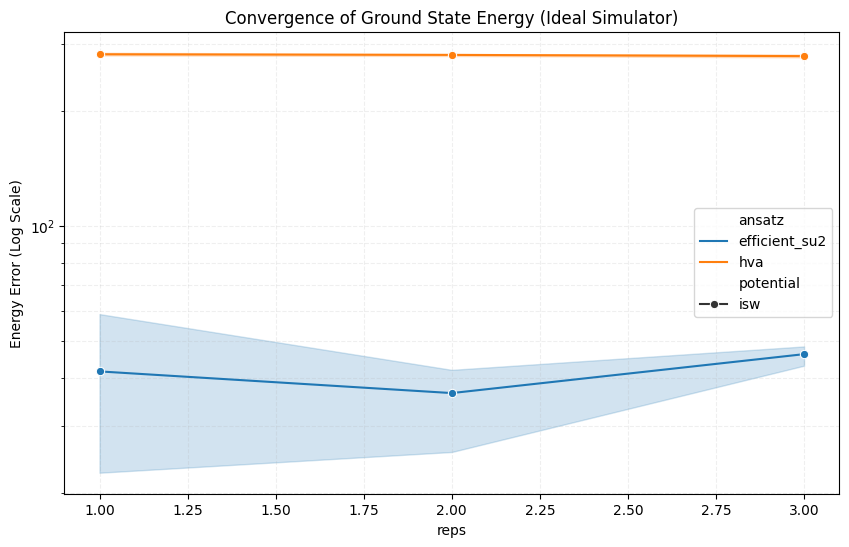

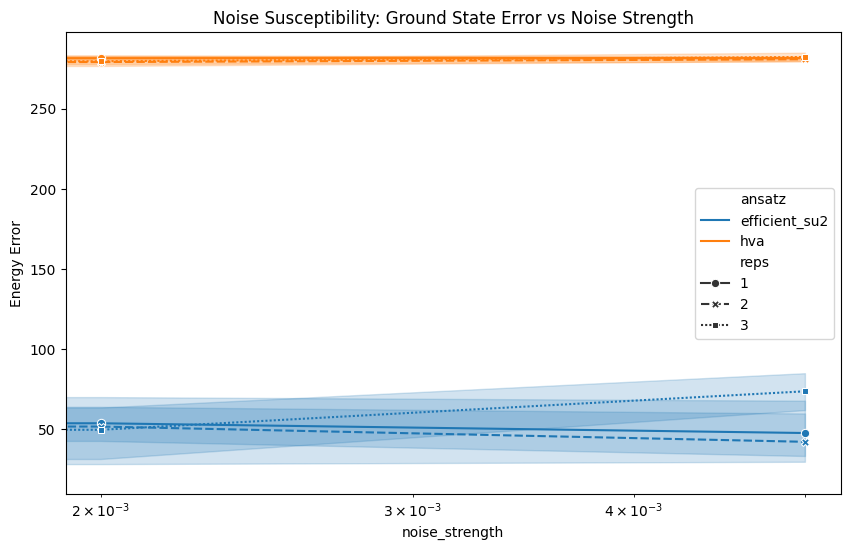

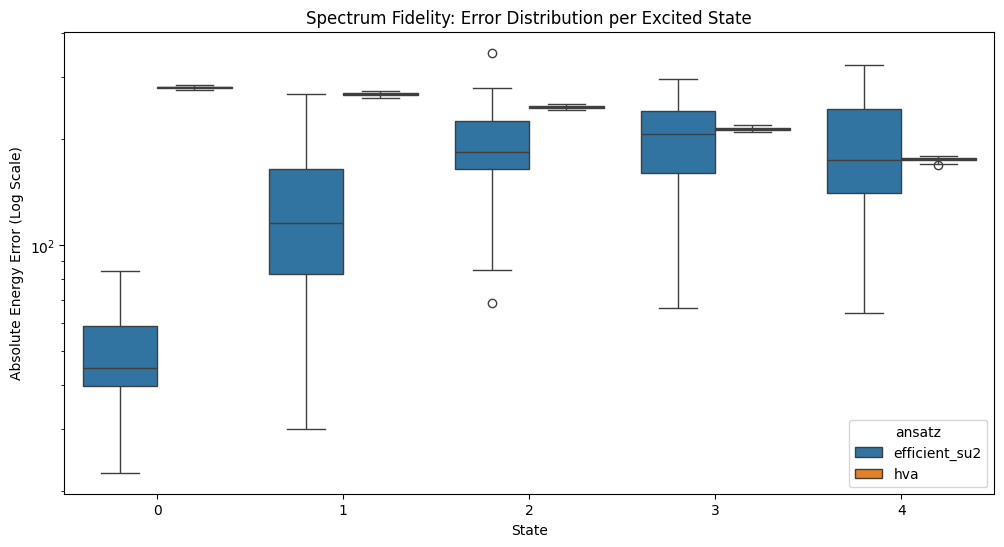

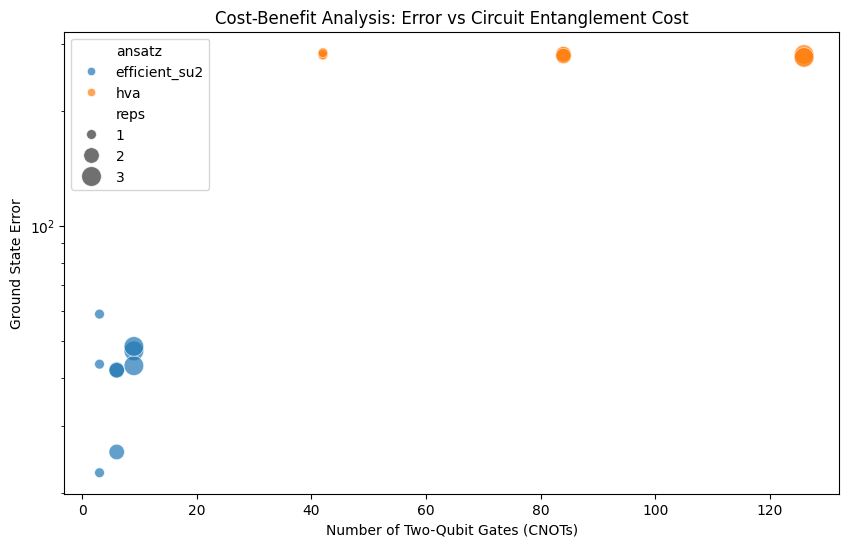

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data (as you did in cell 5)
df = pd.read_parquet("../results/runs.parquet")

# ---------------------------------------------------------
# GRAPH 1: Convergence (Error vs Reps)
# Focus on Statevector (ideal) results to measure expressibility
# ---------------------------------------------------------
sv_df = df[df['backend'] == 'statevector']

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=sv_df, 
    x='reps', 
    y='E_err0', 
    hue='ansatz', 
    style='potential',
    markers=True, 
    dashes=False
)
plt.yscale('log')
plt.title('Convergence of Ground State Energy (Ideal Simulator)')
plt.ylabel('Energy Error (Log Scale)')
plt.grid(True, which="both", ls="--", alpha=0.2)
plt.show()

# ---------------------------------------------------------
# GRAPH 2: Noise Robustness
# Focus on Noisy backend results
# ---------------------------------------------------------
noisy_df = df[df['backend'] == 'noisy']

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=noisy_df, 
    x='noise_strength', 
    y='E_err0', 
    hue='ansatz',
    style='reps',
    markers=True
)
plt.title('Noise Susceptibility: Ground State Error vs Noise Strength')
plt.ylabel('Energy Error')
plt.xscale('log') # Log scale often helps if you sampled 0.001, 0.01, 0.1
plt.show()

# ---------------------------------------------------------
# GRAPH 3: Excited States Spectrum Quality (Boxplot)
# Aggregating all runs to see distribution of errors per state
# ---------------------------------------------------------
# We need to "melt" the E_err columns to plot them on one axis
error_cols = [c for c in df.columns if c.startswith('E_err')]
melted_df = df.melt(
    id_vars=['ansatz', 'potential'], 
    value_vars=error_cols, 
    var_name='State', 
    value_name='Error'
)

# Clean up 'State' column names (E_err0 -> 0)
melted_df['State'] = melted_df['State'].str.replace('E_err', '').astype(int)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=melted_df, 
    x='State', 
    y='Error', 
    hue='ansatz'
)
plt.yscale('log')
plt.title('Spectrum Fidelity: Error Distribution per Excited State')
plt.ylabel('Absolute Energy Error (Log Scale)')
plt.show()

# ---------------------------------------------------------
# GRAPH 4: Cost vs Accuracy (Pareto Frontier)
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sv_df, # Use ideal backend to see pure algorithmic cost
    x='two_qubit_count', 
    y='E_err0', 
    hue='ansatz',
    size='reps',
    sizes=(50, 200),
    alpha=0.7
)
plt.yscale('log')
plt.title('Cost-Benefit Analysis: Error vs Circuit Entanglement Cost')
plt.xlabel('Number of Two-Qubit Gates (CNOTs)')
plt.ylabel('Ground State Error')
plt.show()